In [1]:
import numpy as np
import matplotlib.pyplot as plt

from src.systems.lorenz63 import Lorenz63
from src.solvers.explicit import ForwardEulerSolver
from src.methods.image_point import ImagePointAdvector 

import demos.plotters as plotters

## Getting Reference Solution

This could be high resolution model or observations.

In [34]:
# Initialise the Lorenz 63 system - this is the 'high resolution' model.
model = Lorenz63()

# Setup the solver.
endtime = 100
dt = 0.01 
nt = int(endtime/dt)
solver = ForwardEulerSolver(model.force, endtime, nt)

# Run the solver starting from initial condition.
x0 = np.array([-4.32, -6.0, 18.34])
solver.run(x0)

The solution trajectories (left) and vector field (right) shown below.

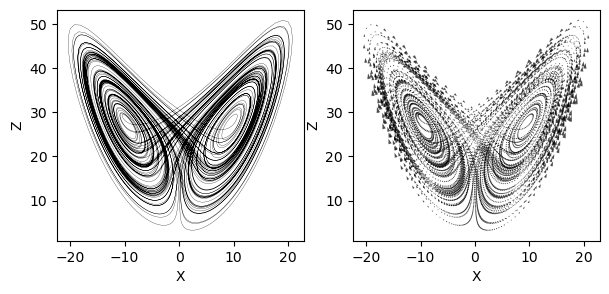

In [35]:
plotters.trajectory_and_vector_subplots(solver)

## Advection of the Image Point

Advect the image point using the vector field calculated from the previous reference solution.

In [43]:
# Initialise the image point advector.
N = 10 
x_ref = solver.xs.copy()
advector = ImagePointAdvector(x_ref, model.force, N)

# Setup the solver.
endtime = 100
dt = 0.01
nt = int(endtime/dt)
solver_adv = ForwardEulerSolver(advector.force, endtime, nt)

# Run the solver.
y0 = x0.copy()
solver_adv.run(y0)

In [46]:
#plotters.plot_trajectory_with_ref(solver_adv, x_ref)

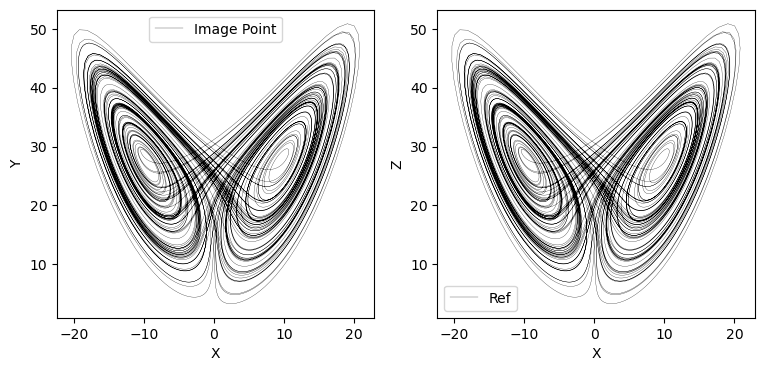

In [44]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(9, 4))
axs[0].plot(solver_adv.xs[:, 0], solver_adv.xs[:, 2], 'k-', linewidth=0.2)
axs[0].set_xlabel("X")
axs[0].set_ylabel("Y")
axs[0].legend(["Image Point"])

axs[1].plot(x_ref[:, 0], x_ref[:, 2], 'k-', linewidth=0.2)
axs[1].set_xlabel("X")
axs[1].set_ylabel("Z")
axs[1].legend(["Ref"])

In [45]:
np.all(solver_adv.xs == x_ref)

True

## Advection of the Image Point with Nudging

Add nudging to previous method.

In [24]:
# Initialise image point advector.
N = 10 
x_ref = solver.xs
advector = ImagePointAdvector(solver.xs, model.force, N, eta=1, nudge=True)

# Setup the solver.
endtime = 0.5
dt = 0.01
nt = int(endtime/dt)
solver_adv = ForwardEulerSolver(advector.force, endtime, nt)

# Run the solver.
y0 = x0.copy()
solver_adv.run(y0)

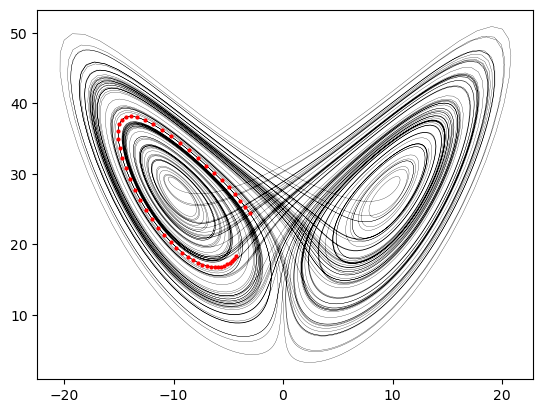

In [8]:
plotters.plot_trajectory_with_ref(solver_adv, x_ref)

## Need some metrics